In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
import warnings

In [16]:
df=pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


1. Get the basic info about the data (info, description, data types, shapes)

In [4]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [5]:
df.shape

(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**2.Check for any duplicates values in the data.**

In [7]:
df.duplicated().sum()

0

3. Check the null value in the dataset.

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

4. Are there any Null values in Dataset. If so, impute the missing values using mode.

In [9]:
mode = df['Age'].mode().values[0]
df['Age']= df['Age'].replace(np.nan, mode)
  
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

5.Compute mean and standard deviation of data

In [10]:
mean = np.array(np.mean(df,axis=0))
std = np.array(np.std(df,axis=0))

print(mean)
print(std)

[1.10050000e+03 3.63636364e-01 2.26555024e+00 2.83648325e+01
 4.47368421e-01 3.92344498e-01 3.56271885e+01]
[120.66586095   0.48104569   0.84082997  13.16434112   0.89568624
   0.98025422  55.84050048]


G:\Python\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
G:\Python\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


**6. Visualize the relationship between the variables using correlation, heatmap.**

In [11]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.031621,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,0.021962,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.503026,0.001087,0.018721,-0.577147
Age,-0.031621,0.021962,-0.503026,1.000000,-0.054656,-0.040213,0.369473
SibSp,0.003818,0.099943,0.001087,-0.054656,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.040213,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.369473,0.171539,0.230046,1.000000


<AxesSubplot:>

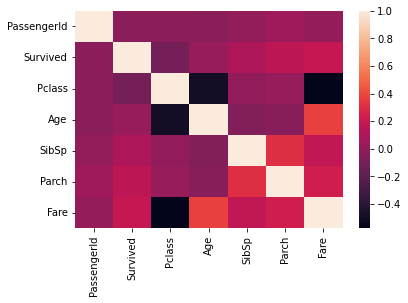

In [12]:
# Visualise the correlation between independent and dependent variables using Heat Map
sns.heatmap(df.corr())

7. Visualise the histogram, scatterplot.

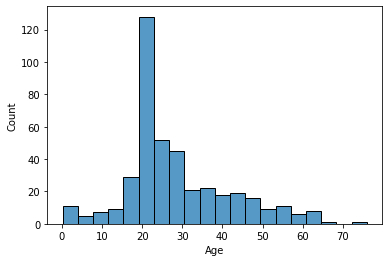

In [13]:
# Visualise the distribution of independent and dependent variables
'''Create subplots in 2 row and 2 columns'''
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.histplot(x='Age', data=df, )
plt.show()

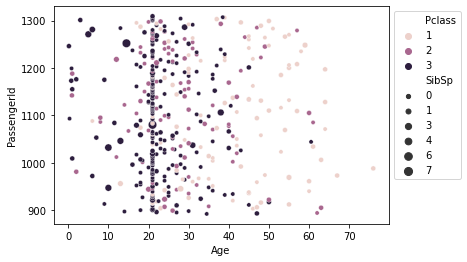

In [14]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot( x="Age", y='PassengerId', data=df,
                hue='Pclass', size='SibSp')
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

8. Check for outliers in the Age feature.

G:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


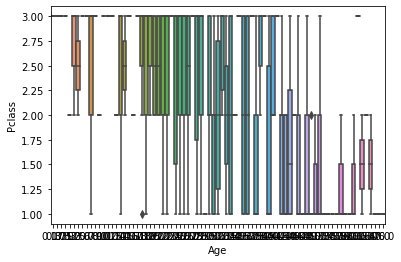

In [28]:
sns.boxplot( df.Age, df.Pclass)
plt.show()